In [1]:
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
from copy import deepcopy
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
data = pd.read_csv('movies_metadata.csv')
print(data.shape)
print(data.head)

C:\Users\sidde\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(45466, 24)
<bound method NDFrame.head of        adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                 

In [62]:
data['vote_count']

KeyError: ('vote_average', 'vote_count')

In [63]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [64]:
newdata=data.iloc[:,22:24].head(100)

In [65]:
newdata

,vote_average,vote_count
0,7.7,5415.0
1,6.9,2413.0
2,6.5,92.0
3,6.1,34.0
4,5.7,173.0
...,...,...
95,7.9,695.0
96,5.6,13.0
97,6.8,4.0
98,6.0,67.0


In [66]:
from sklearn.cluster import KMeans

In [67]:
kmeans = KMeans(3)

In [68]:
kmeans.fit(newdata)

KMeans(n_clusters=3)

In [69]:
kmeans.cluster_centers_

array([[   6.08876404,  140.33707865],
       [   7.9       , 5665.        ],
       [   7.13333333, 1880.11111111]])

In [70]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [71]:
print(dict(zip(unique, counts)))

{0: 89, 1: 2, 2: 9}


C:\Users\sidde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sidde\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


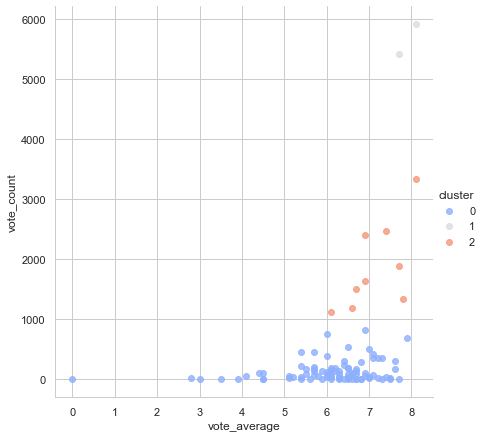

In [72]:
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('vote_average','vote_count', data=newdata, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)